In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as kxe_kxe
kxe_kxe.filterwarnings('ignore')

# Методичка

In [142]:
df = pd.read_csv('data/mall_customers_clustering.csv', index_col=0)
df.head()

CustomerID   Genre  Age  Income  Score
0           1    Male   19   15000   0.39
1           2    Male   21   15000   0.81
2           3  Female   20   16000   0.06
3           4  Female   23   16000   0.77
4           5  Female   31   17000   0.40

<Axes: xlabel='Income', ylabel='Score'>

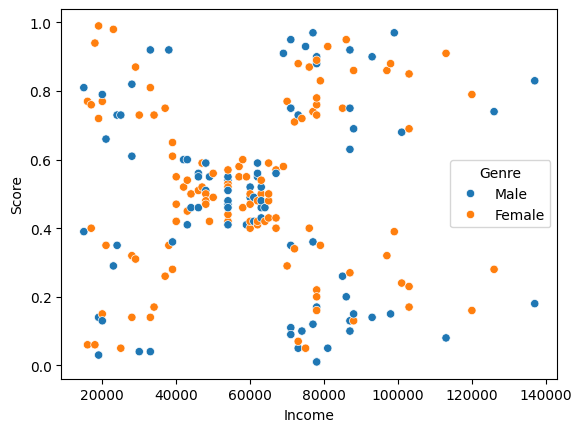

In [143]:
sns.scatterplot(x='Income' , y='Score',data=df , hue='Genre')

In [144]:
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)

In [145]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=42).fit(X)

In [146]:
y_kmeans = k_means.labels_

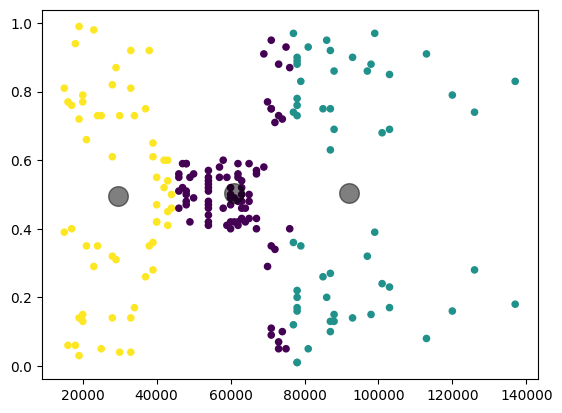

In [147]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

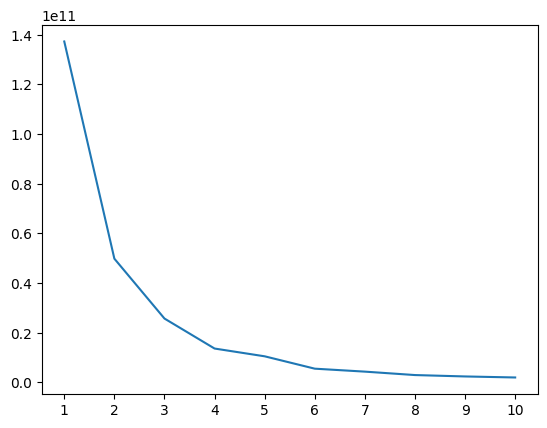

In [148]:
wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(X)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
_ = plt.show()

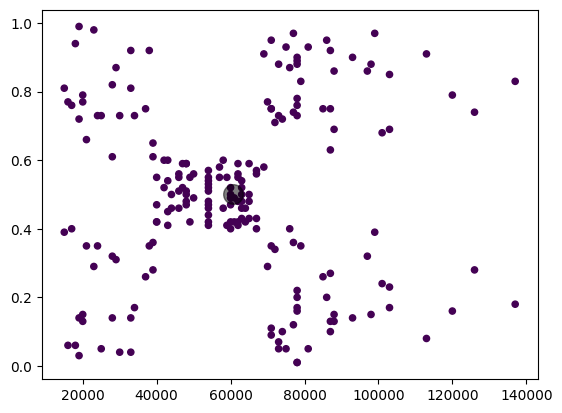

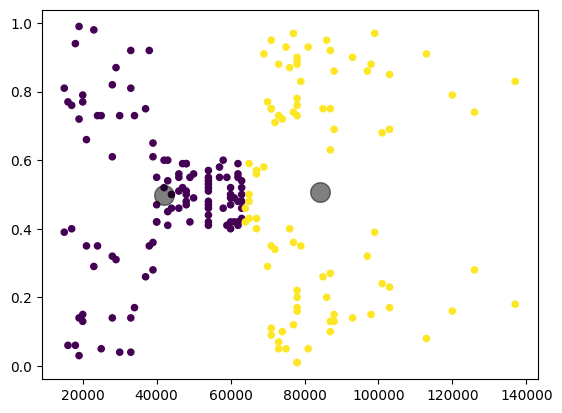

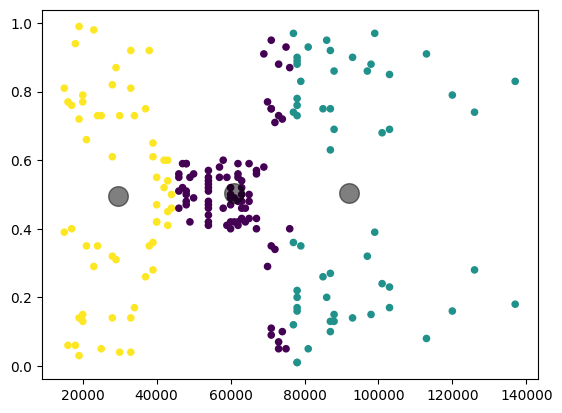

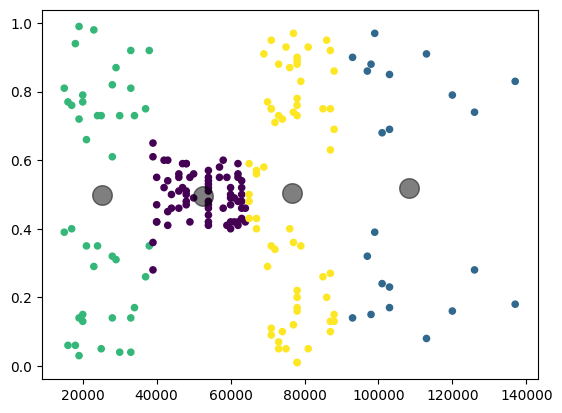

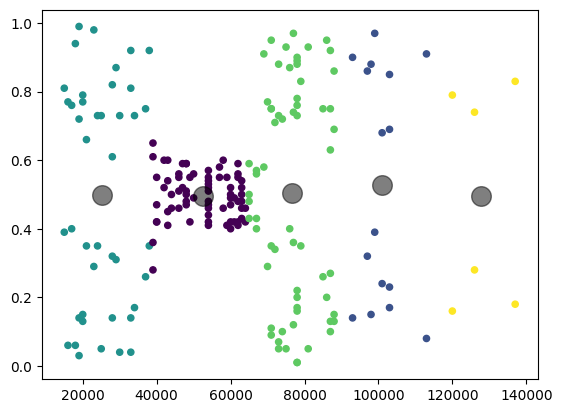

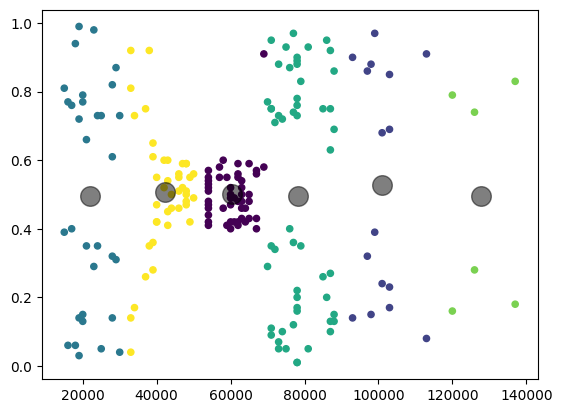

In [149]:
def build_clus(n_clusters,X=X):
    k_means = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    y_kmeans = k_means.labels_
    plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
    centers = k_means.cluster_centers_
    plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)
    plt.show()
    
for i in range(1,7):
    build_clus(i)

In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

Age    Income     Score  Genre_Female  Genre_Male
0 -1.424569 -1.738999 -0.434801     -1.128152    1.128152
1 -1.281035 -1.738999  1.195704     -1.128152    1.128152
2 -1.352802 -1.700830 -1.715913      0.886405   -0.886405
3 -1.137502 -1.700830  1.040418      0.886405   -0.886405
4 -0.563369 -1.662660 -0.395980      0.886405   -0.886405

<Axes: xlabel='Income', ylabel='Score'>

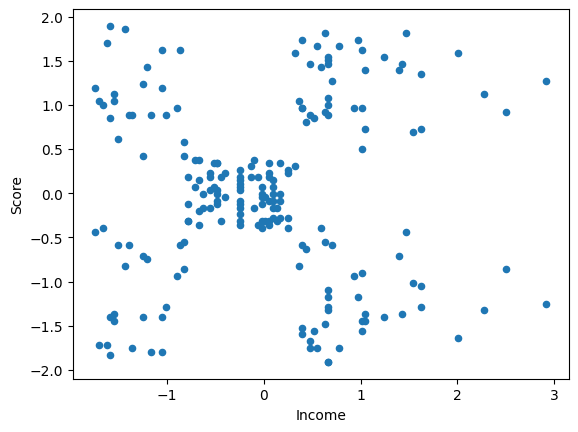

In [151]:
X_scaled.plot.scatter('Income','Score')

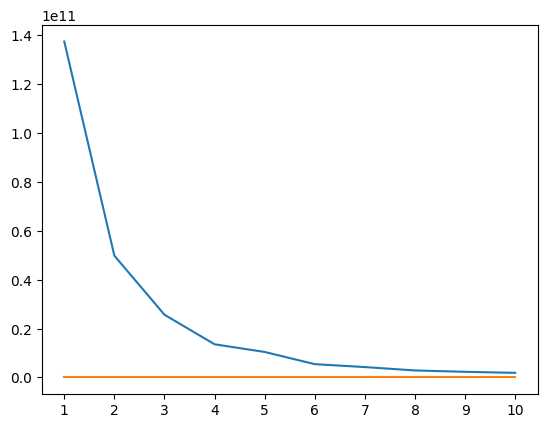

In [152]:
unscaled, scaled = [], []
for i in range(1,11):
	unscaled.append(KMeans(n_clusters=i,random_state=42).fit(X).inertia_)
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),unscaled)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

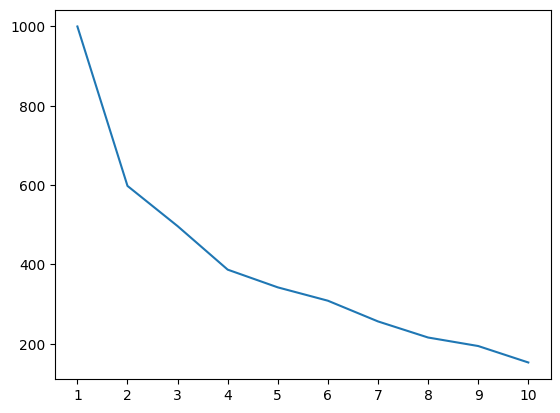

In [153]:
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

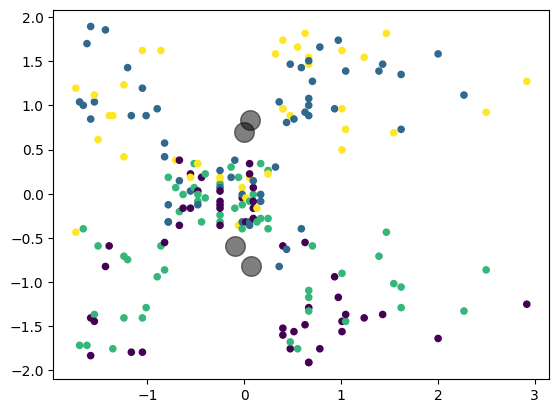

In [154]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
y_kmeans = k_means.labels_
plt.scatter(X_scaled.Income, X_scaled.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)
plt.show()

In [155]:
X_flat = X_scaled.drop(["Age", "Genre_Female", "Genre_Male"], axis=1)
X_flat.head()

Income     Score
0 -1.738999 -0.434801
1 -1.738999  1.195704
2 -1.700830 -1.715913
3 -1.700830  1.040418
4 -1.662660 -0.395980

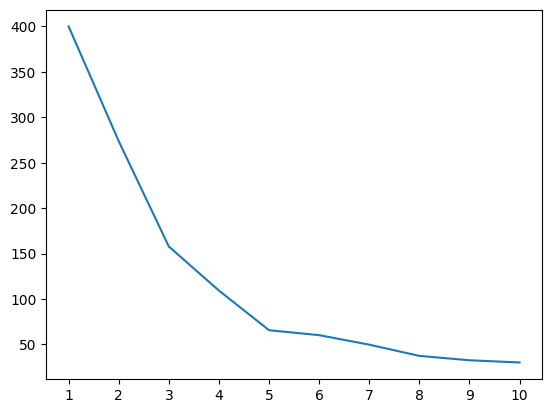

In [156]:
flat = []
for i in range(1,11):
	flat.append(KMeans(n_clusters=i,random_state=42).fit(X_flat).inertia_)
plt.plot(range(1,11),flat)
plt.xticks(range(1,11))
_ = plt.show()

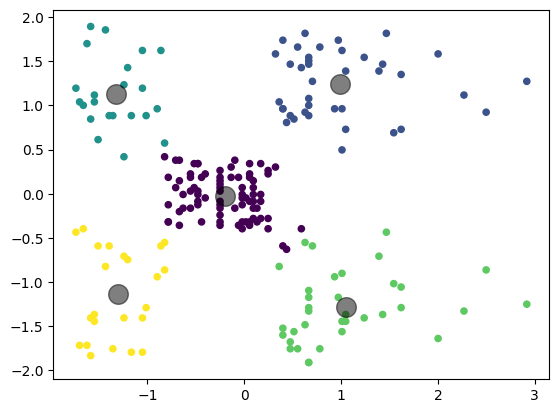

In [157]:
k_means = KMeans(n_clusters=5, random_state=42).fit(X_flat)
y_kmeans = k_means.labels_
plt.scatter(X_flat.Income, X_flat.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [158]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

In [159]:
from scipy.cluster.hierarchy import dendrogram

In [160]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

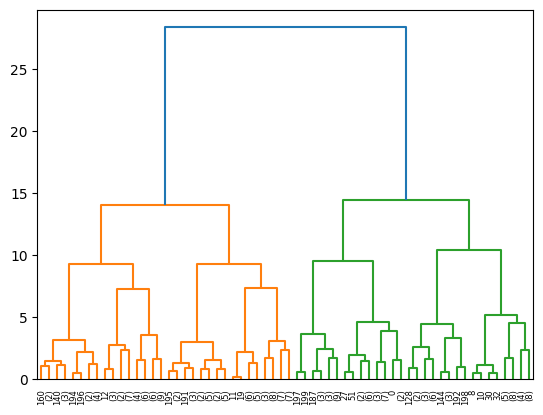

In [161]:
plot_dendrogram(model, truncate_mode="level", p=5)

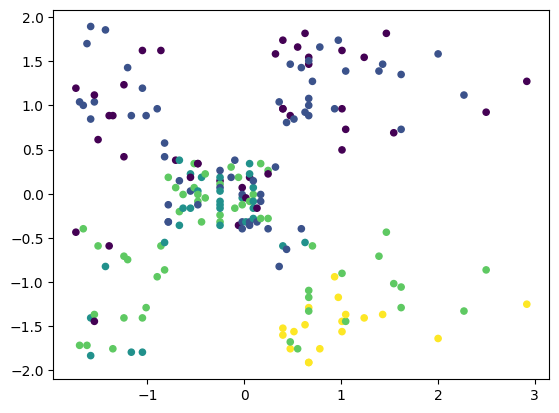

In [162]:
agg_clustering = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

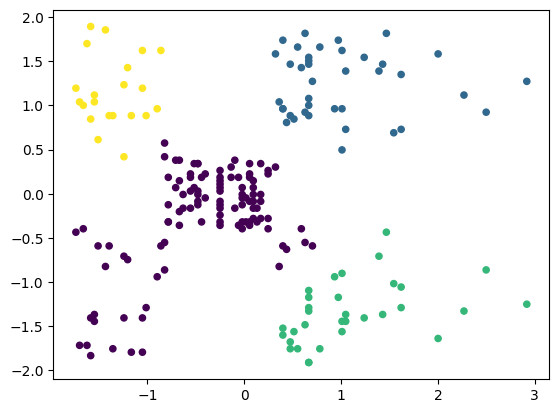

In [163]:
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(X_flat)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

In [164]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

In [165]:
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise_ = list(y_db).count(-1)

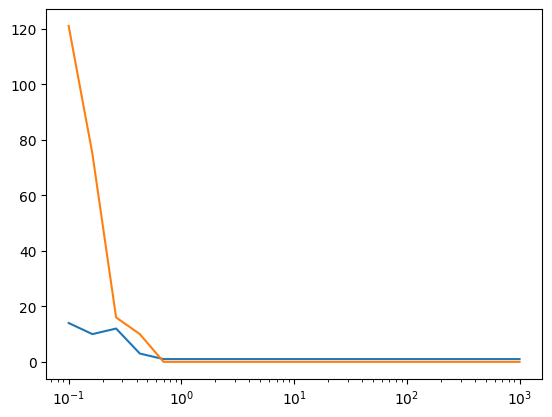

In [166]:
clusters, noise = [], []
for i in np.logspace(-1, 3, 20):
  db = DBSCAN(eps=i, min_samples=3).fit(X_flat)
  y_db = db.labels_

  clusters.append(len(set(y_db)) - (1 if -1 in y_db else 0))
  noise.append(list(y_db).count(-1))

plt.plot(np.logspace(-1, 3, 20),clusters)
plt.plot(np.logspace(-1, 3, 20),noise)
plt.xscale('log')
_ = plt.show()

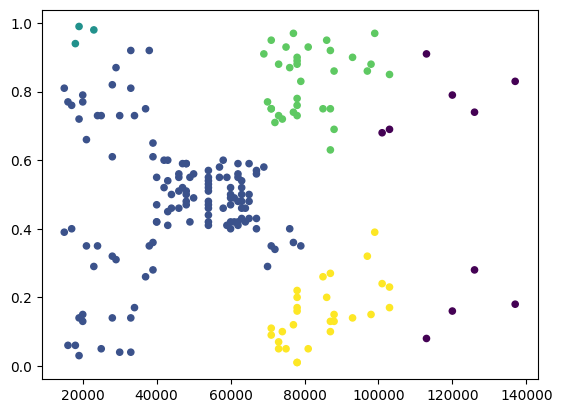

In [167]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

plt.scatter(X.Income, X.Score, c=y_db, s=20, cmap='viridis')

# Задание 1

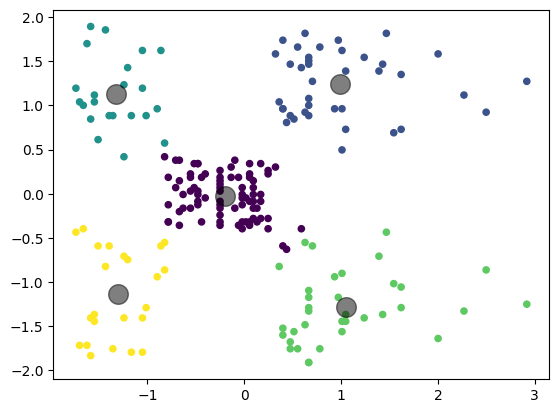

In [168]:
k_means = KMeans(n_clusters=5, random_state=42).fit(X_flat)
y_kmeans = k_means.labels_
plt.scatter(X_flat.Income, X_flat.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [169]:
preds = k_means.predict(X_flat)
X_new = X_flat.copy()
X_new['Cluster'] = preds


X_new.sort_values('Cluster',inplace=True)


for i in set(preds):
    cloude = X_new[X_new['Cluster'] == i]
    
    print(f'Кластер {i} находится в области, ограниченной значениями:')
    for j in cloude.columns[:-1]:
        print(f'По столбцу {j}: {round(cloude[j].max(),3)}    {round(cloude[j].min(),3)}')
    print()

Кластер 0 находится в области, ограниченной значениями:
По столбцу Income: 0.589    -0.823
По столбцу Score: 0.419    -0.629

Кластер 1 находится в области, ограниченной значениями:
По столбцу Income: 2.918    0.322
По столбцу Score: 1.817    0.497

Кластер 2 находится в области, ограниченной значениями:
По столбцу Income: -0.823    -1.739
По столбцу Score: 1.894    0.419

Кластер 3 находится в области, ограниченной значениями:
По столбцу Income: 2.918    0.36
По столбцу Score: -0.435    -1.91

Кластер 4 находится в области, ограниченной значениями:
По столбцу Income: -0.823    -1.739
По столбцу Score: -0.396    -1.832



# Задание 2

In [170]:
from itertools import combinations

X_scaled.drop("Genre_Female",axis=1,inplace=True)

('Age', 'Income')


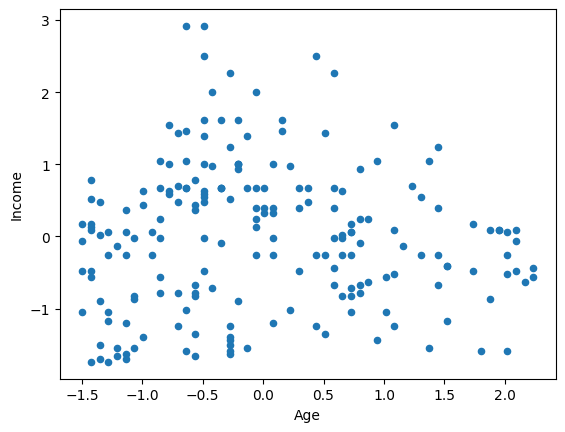

('Age', 'Score')


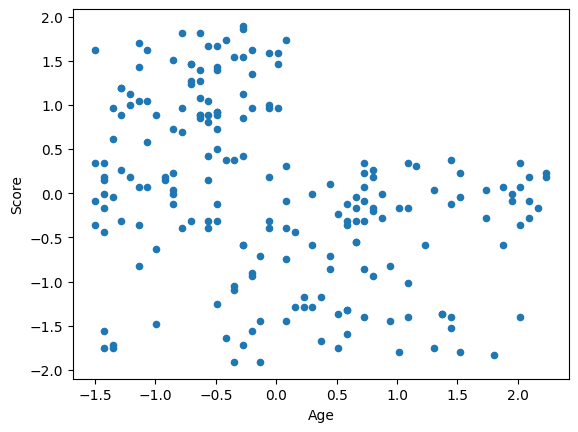

('Age', 'Genre_Male')


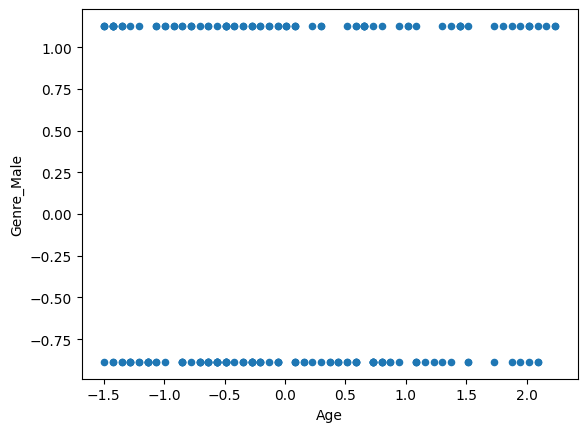

('Income', 'Genre_Male')


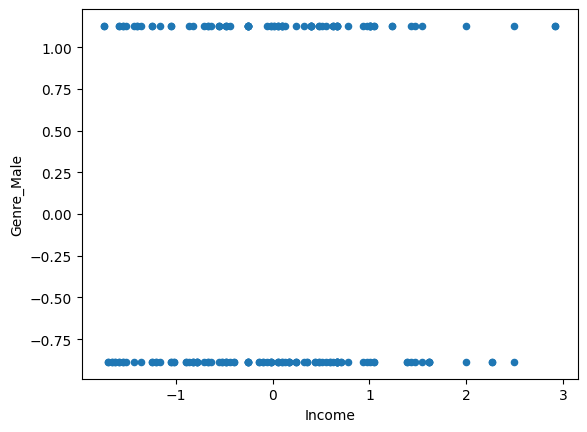

('Score', 'Genre_Male')


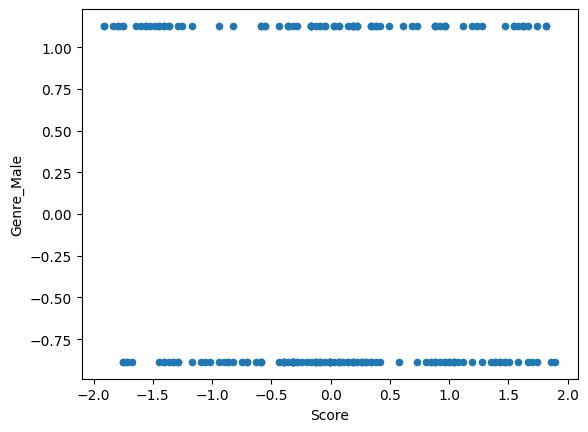

In [178]:
for com in [i for i in list(combinations(X_scaled.columns,r=2)) if i not in [('Income', 'Score')]]:
    print(com)
    X_flat = X_scaled[list(com)]
    X_flat.plot.scatter(*com)
    plt.show()
    # k_means = KMeans(n_clusters=2, random_state=42).fit(X_flat)
    # y_kmeans = k_means.labels_
    # plt.scatter(X_flat.iloc[:,0], X_flat.iloc[:,1], c=y_kmeans, s=20, cmap='viridis')
    # centers = k_means.cluster_centers_
    # plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    # plt.show()
    # #display(X_flat.head())

Более разделимых по значению в столбцах, чем преддставленные в методичке примерах, не было найдено. Кроме как делить по половому признаку


# Задание 3

In [203]:
df = pd.read_csv('data/credit_card_clustering.csv', index_col=0)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003         7500.0   622.066742        627.284787          0.000000      12  
C10004         7500.0     0.000000               NaN          0.000000      12  
C10005         1200.0   678.334763        244.791237          0.000000      12

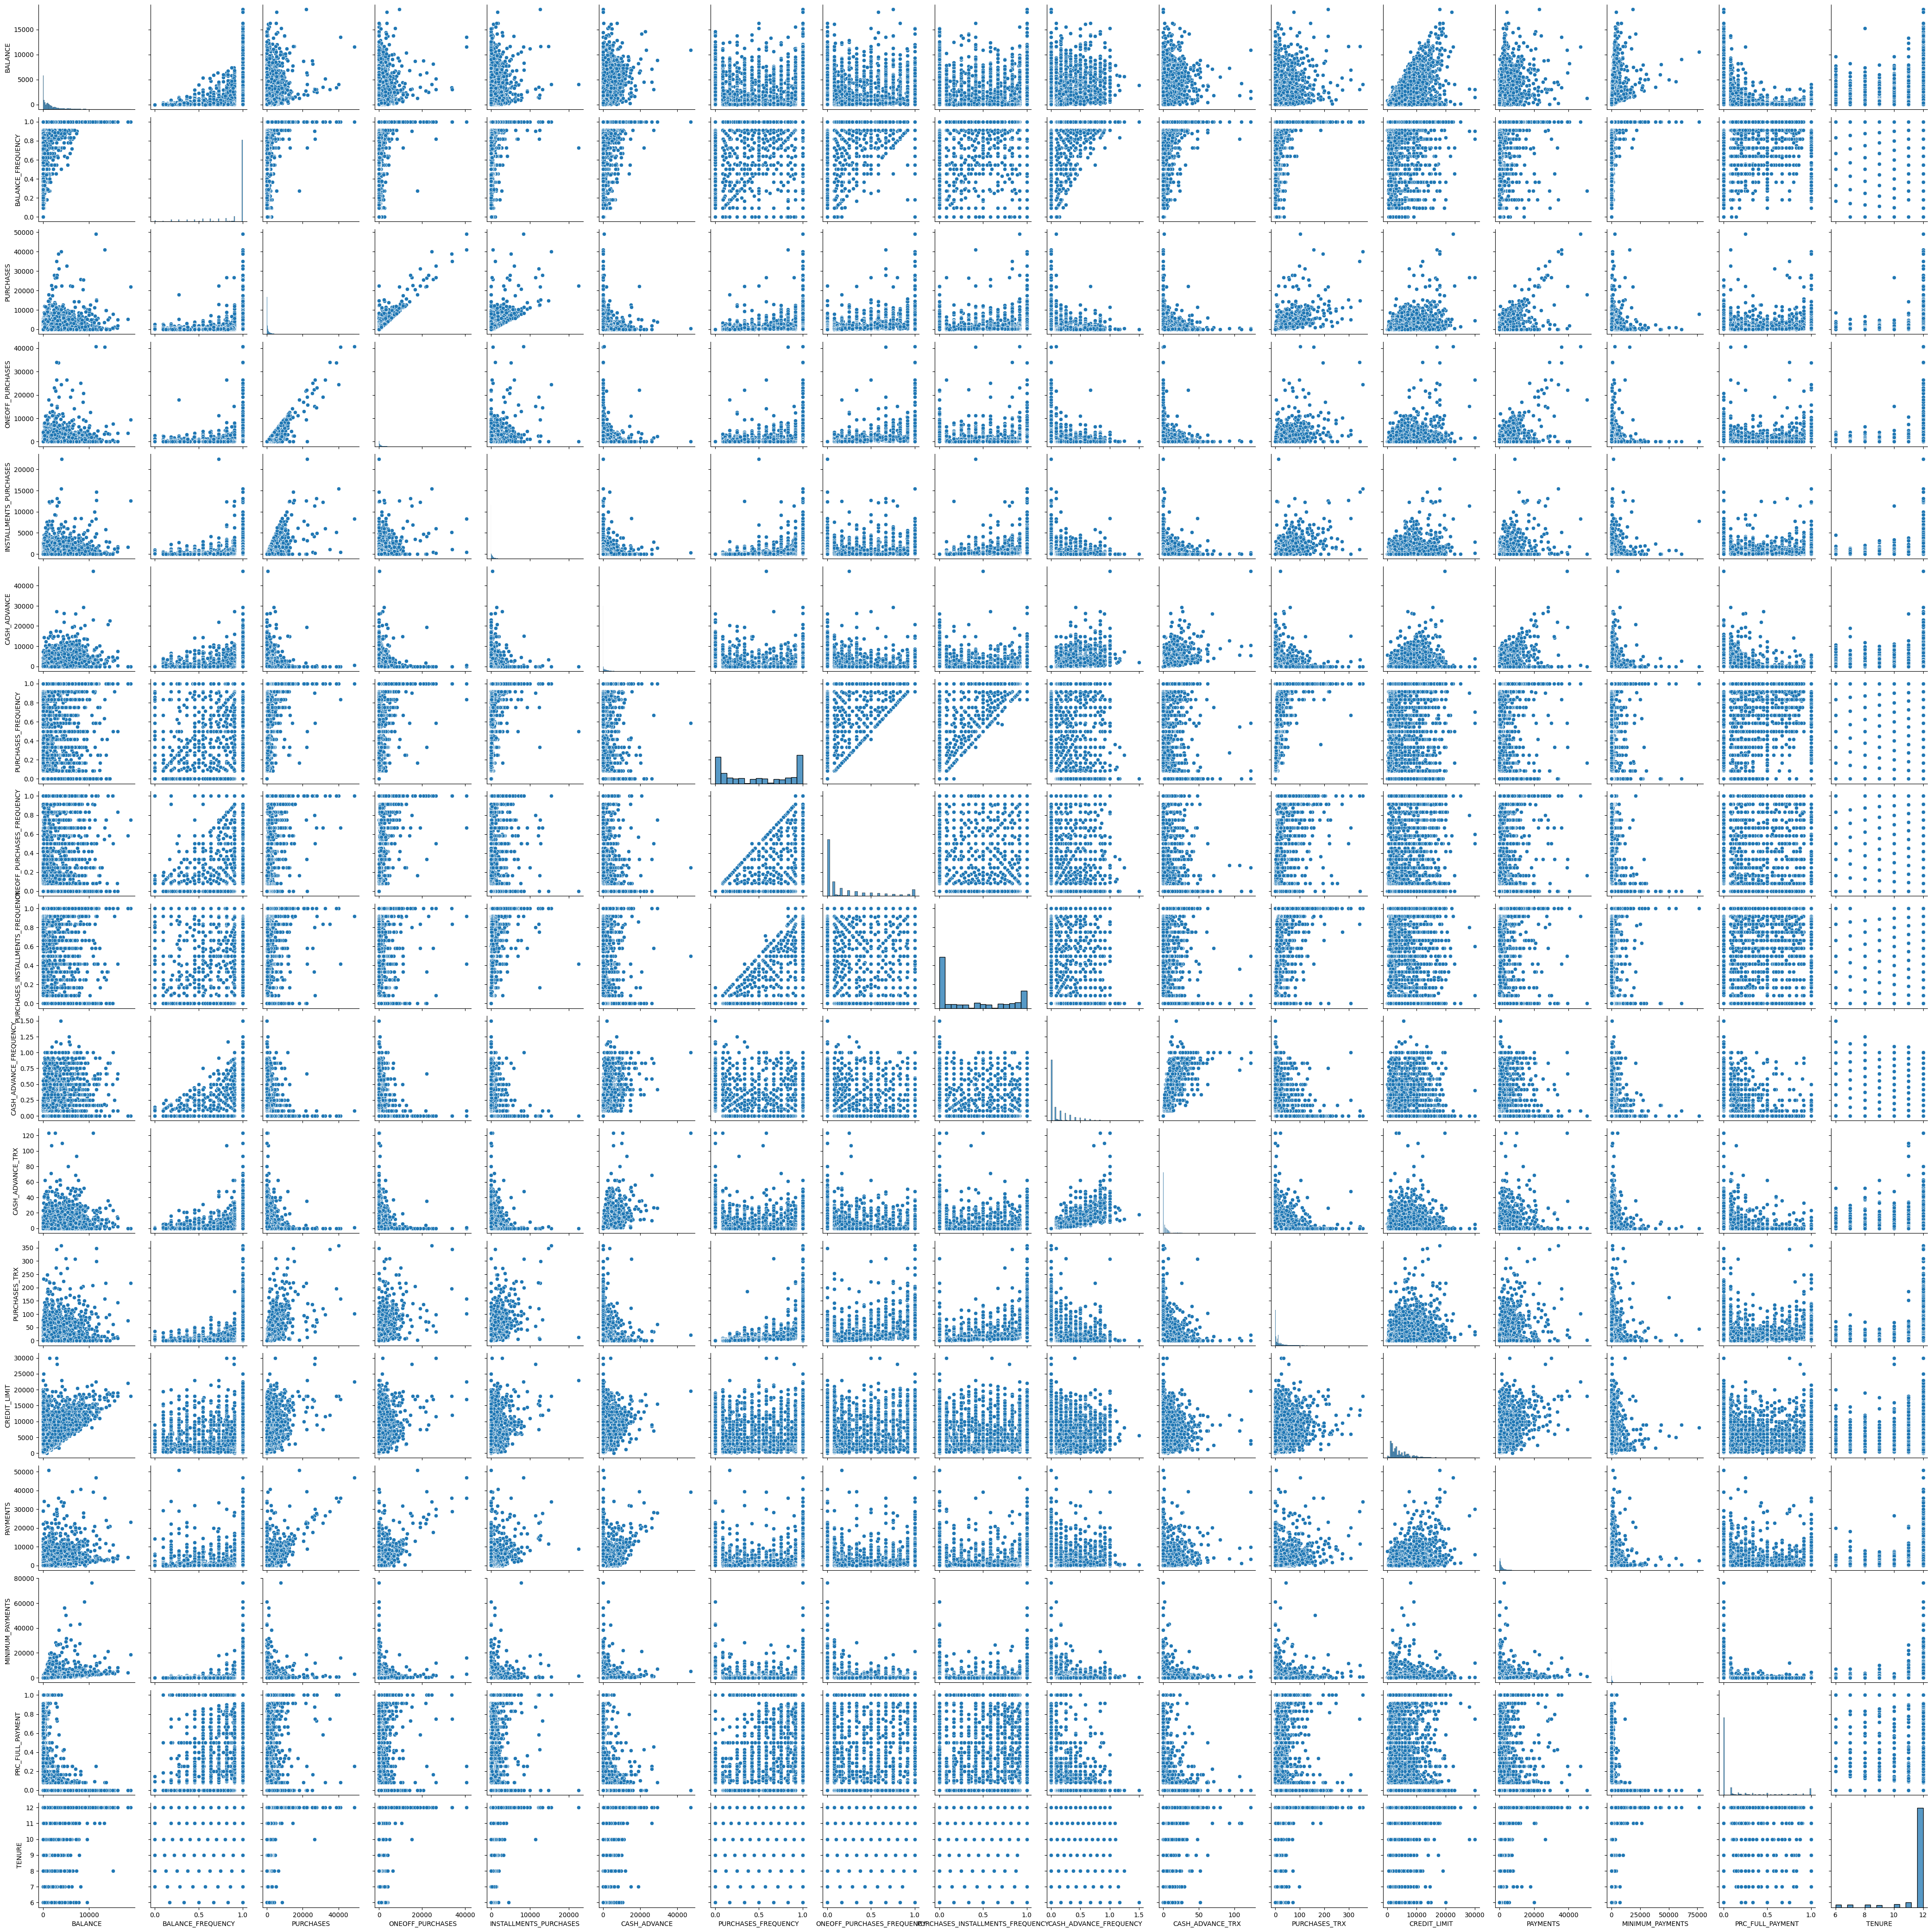

In [181]:
# for com in list(combinations(df.columns,r=2)):
#     print(com)
#     X_flat = df[list(com)]
#     X_flat.plot.scatter(*com)
#     plt.show()

sns.pairplot(df)

признаков слишком много и явные кластеры не наблюдаются

In [204]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [205]:
df.dropna(inplace=True)

In [206]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [207]:
X = pd.get_dummies(df)

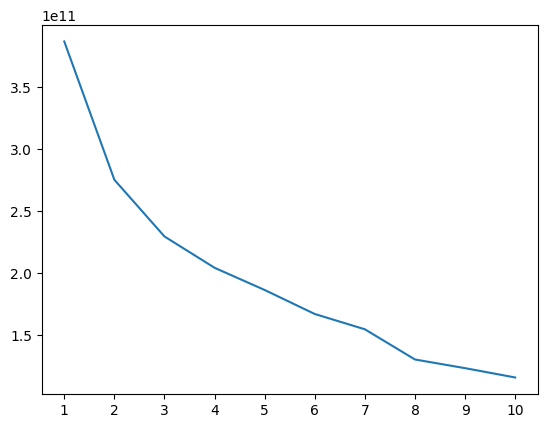

In [208]:
wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(X)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
_ = plt.show()

In [209]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.744625          -0.370047  -0.429184         -0.359160   
1  0.764152           0.067679  -0.473208         -0.359160   
2  0.426602           0.505405  -0.116413          0.099909   
3 -0.373910           0.505405  -0.465825         -0.349660   
4  0.099551           0.505405   0.142062         -0.359160   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.354826     -0.468655            -0.820769   
1               -0.458839      2.568556            -1.236139   
2               -0.458839     -0.468655             1.256077   
3               -0.458839     -0.468655            -1.028455   
4                0.994815     -0.468655             0.425339   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.686280                         -0.717179   
1                   -0.686280                         -0.926522   
2                    2.646651                         -0.926522   
3                   -0.408536                         -0.926522   
4                   -0.686280                          0.538882   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.681953         -0.479437      -0.517623     -0.962575   
1                0.557022          0.099258      -0.597054      0.677204   
2               -0.681953         -0.479437      -0.120467      0.813852   
3               -0.681953         -0.479437      -0.557339     -0.907916   
4               -0.681953         -0.479437      -0.279329     -0.743938   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -0.543942         -0.305508         -0.537727  0.355181  
1  0.796852          0.087689          0.212380  0.355181  
2 -0.399503         -0.099906         -0.537727  0.355181  
3 -0.380165         -0.261131         -0.537727  0.355181  
4 -0.132119          0.650363         -0.537727  0.355181

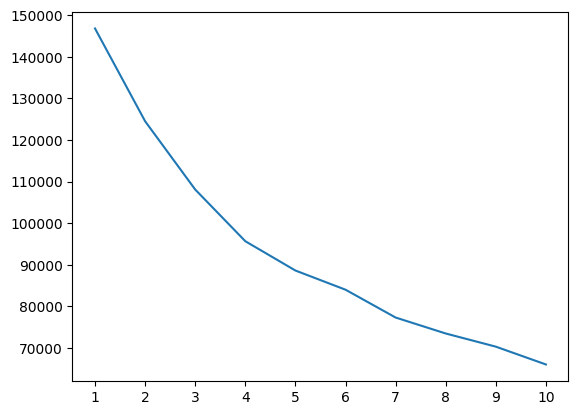

In [210]:
scaled = []
for i in range(1,11):
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

Попробуем усеньшить размерность

## t-SNE

In [216]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X_scaled)
X_embedded.shape

(8636, 2)

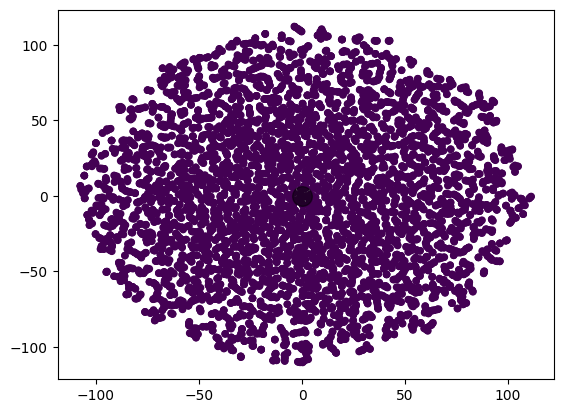

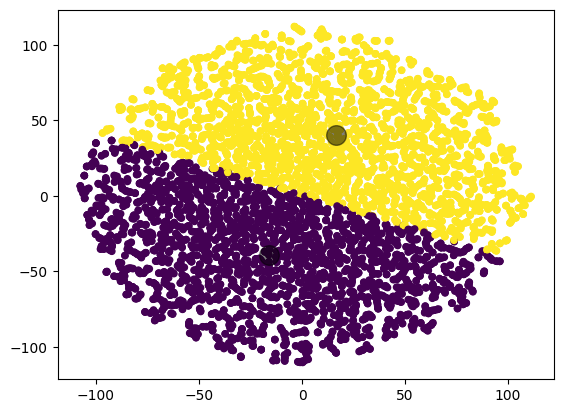

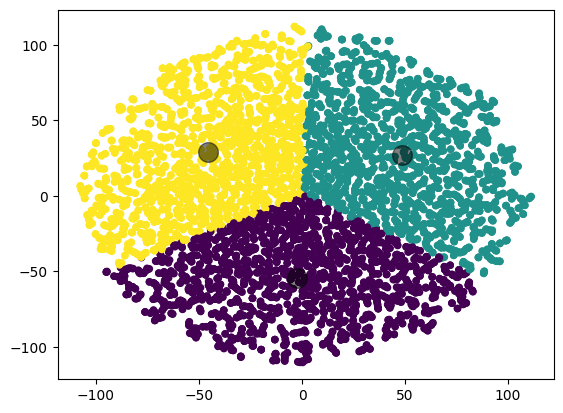

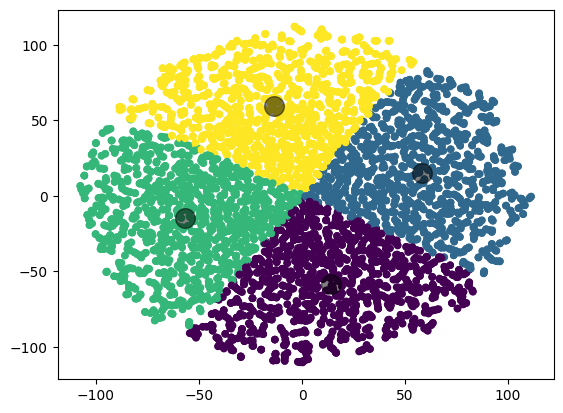

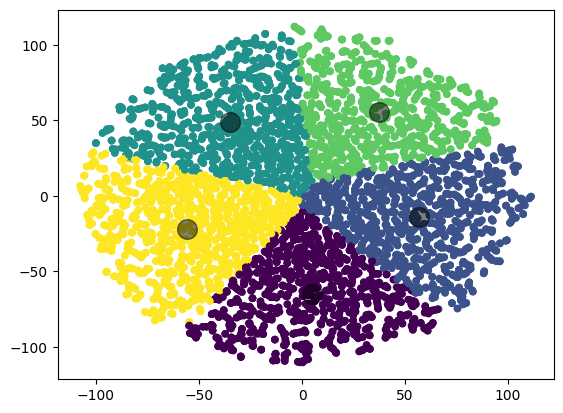

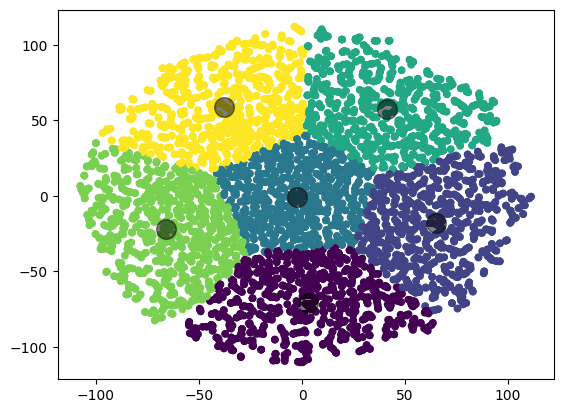

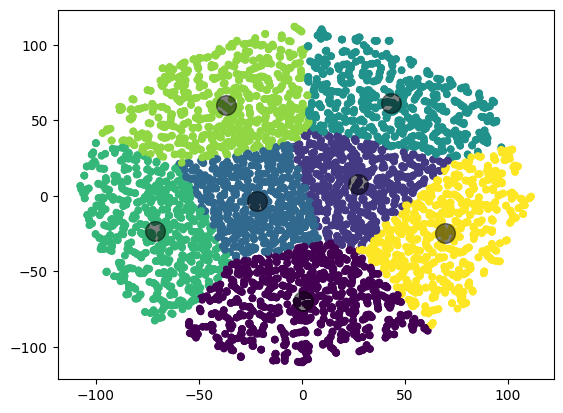

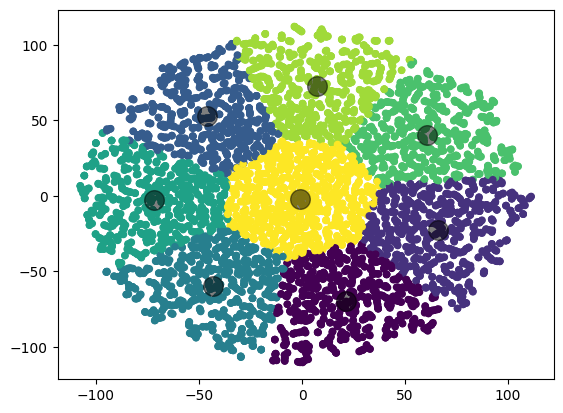

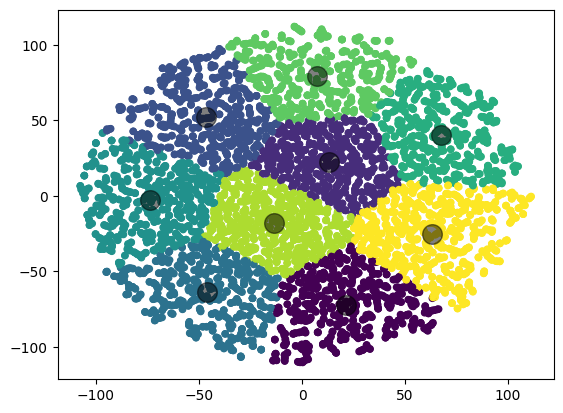

In [215]:
for i in range(1,10):
    
    k_means = KMeans(n_clusters=i, random_state=42).fit(X_embedded)
    y_kmeans = k_means.labels_
    plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_kmeans, s=20, cmap='viridis')
    centers = k_means.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

## PCA

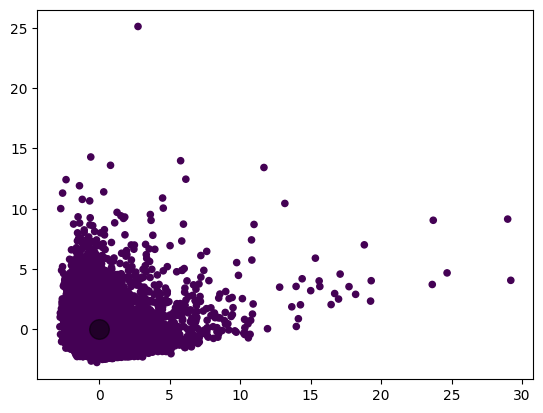

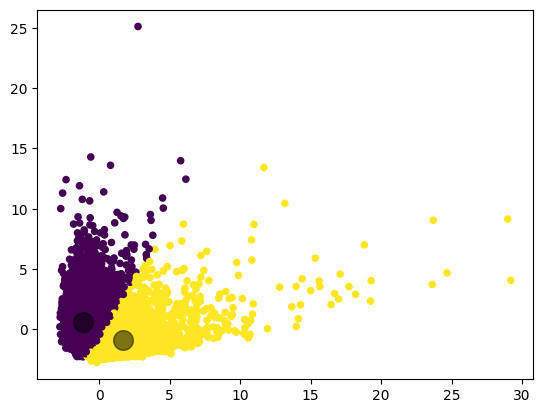

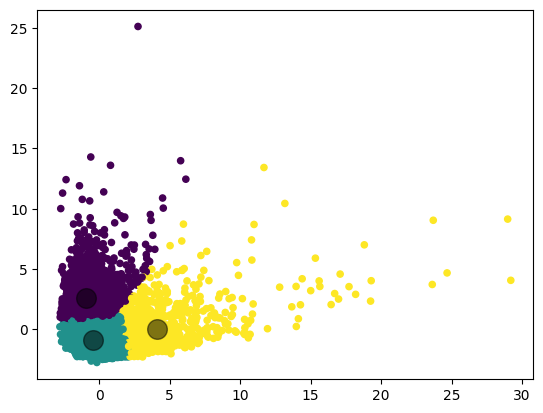

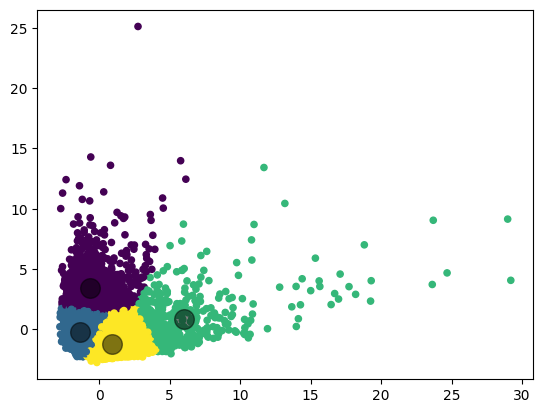

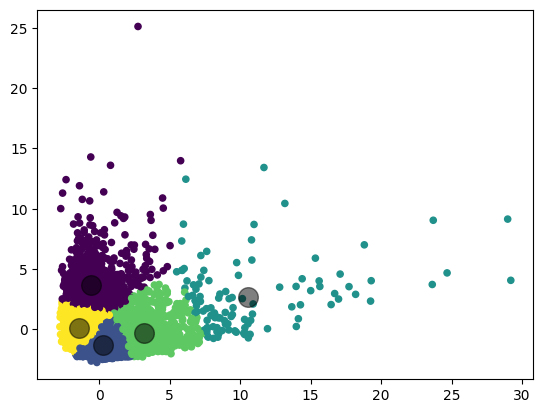

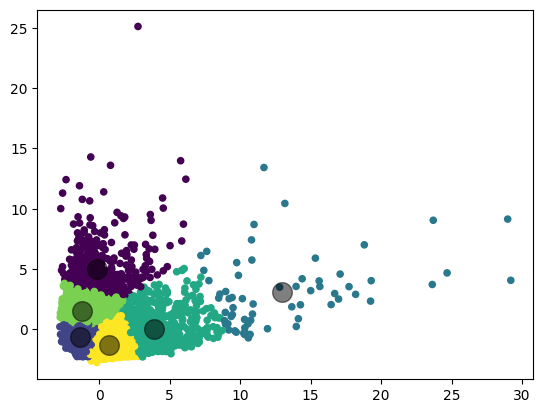

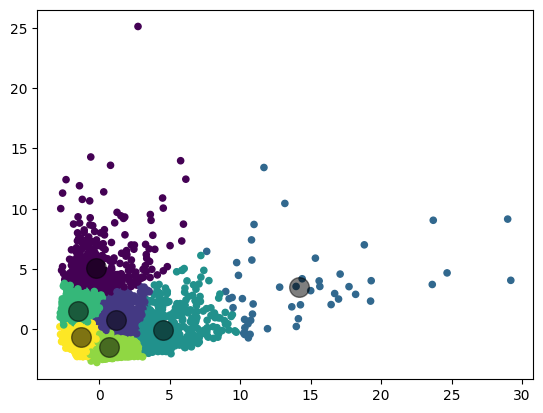

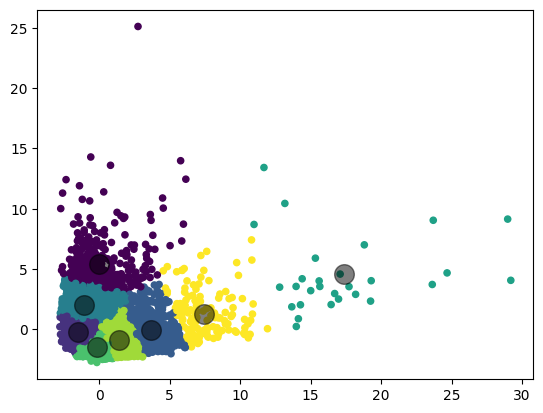

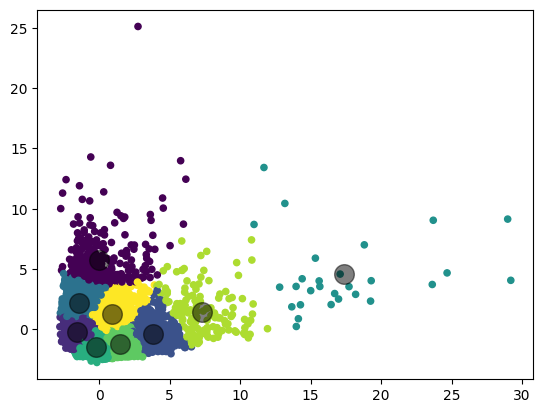

In [ ]:
from sklearn.decomposition import PCA

# Применяем PCA для снижения размерности до 2-х главных компонент
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X_scaled)
X_scaled['PCA1'] = pca_result[:, 0]
X_scaled['PCA2'] = pca_result[:, 1]

X_flat = X_scaled[['PCA1','PCA2']]

for i in range(1,10):
    
    k_means = KMeans(n_clusters=i, random_state=42).fit(X_flat)
    y_kmeans = k_means.labels_
    plt.scatter(X_flat.iloc[:,0], X_flat.iloc[:,1], c=y_kmeans, s=20, cmap='viridis')
    centers = k_means.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

In [217]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

In [218]:
from scipy.cluster.hierarchy import dendrogram

In [220]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

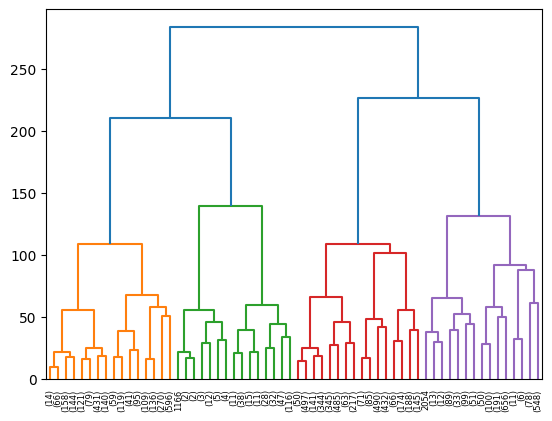

In [221]:
plot_dendrogram(model, truncate_mode="level", p=5)

In [ ]:
'BALANCE_FREQUENCY', 'PRC_FULL_PAYMENT'

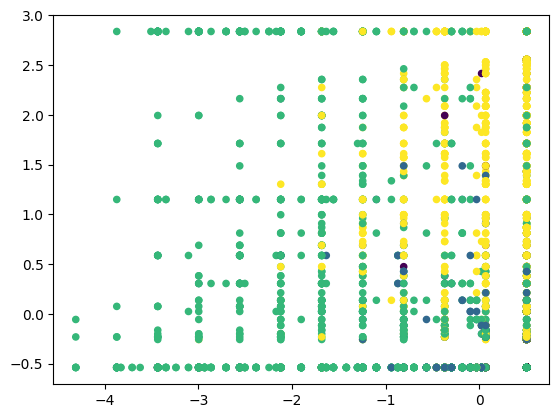

In [224]:
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(X_scaled)
y_agg = agg_clustering.labels_

plt.scatter(X_scaled.BALANCE_FREQUENCY, X_scaled.PRC_FULL_PAYMENT, c=y_agg, s=20, cmap='viridis')

In [225]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.4, min_samples=3).fit(X_scaled[['BALANCE_FREQUENCY', 'PRC_FULL_PAYMENT']])
y_db = db.labels_

In [226]:
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise_ = list(y_db).count(-1)

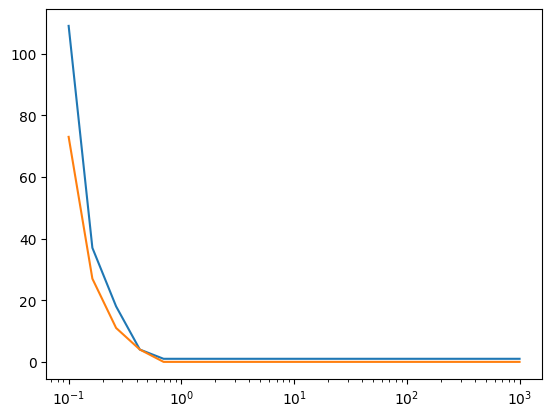

In [227]:
clusters, noise = [], []
for i in np.logspace(-1, 3, 20):
  db = DBSCAN(eps=i, min_samples=3).fit(X_scaled[['BALANCE_FREQUENCY', 'PRC_FULL_PAYMENT']])
  y_db = db.labels_

  clusters.append(len(set(y_db)) - (1 if -1 in y_db else 0))
  noise.append(list(y_db).count(-1))

plt.plot(np.logspace(-1, 3, 20),clusters)
plt.plot(np.logspace(-1, 3, 20),noise)
plt.xscale('log')
_ = plt.show()

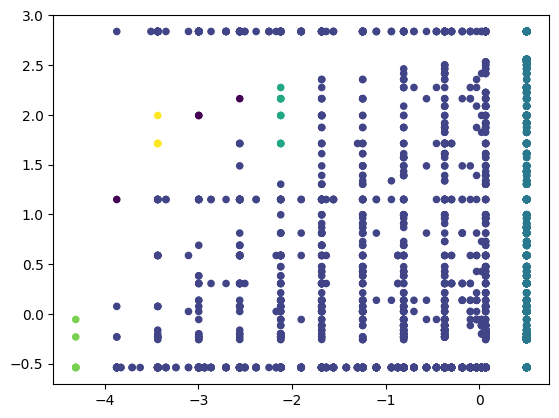

In [229]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_scaled[['BALANCE_FREQUENCY', 'PRC_FULL_PAYMENT']])
y_db = db.labels_

plt.scatter(X_scaled.BALANCE_FREQUENCY, X_scaled.PRC_FULL_PAYMENT, c=y_db, s=20, cmap='viridis')